In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold

In [4]:
# Read in data
df = pd.read_csv('HCVData.csv') 

# Drop Patient ID column
df.drop(df.columns[0],axis=1,inplace=True)
print(df.head())
df1 = df.replace(['0s=suspect Blood Donor','1=Hepatitis','2=Fibrosis','3=Cirrhosis'],'1=Non-Blood Donor')

        Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
0  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
1  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
2  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
3  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
4  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  
0  12.1  69.0  
1  15.6  76.5  
2  33.2  79.3  
3  33.8  75.7  
4  29.9  68.7  


In [5]:
# EDA
print(df.shape)
pd.set_option('display.max_rows', None) 
print(df.dtypes)
print(df['Category'].value_counts())

(615, 13)
Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object
Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64


In [6]:
# Check for missing values
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

fraction of missing values in features:
ALB     0.001626
ALP     0.029268
ALT     0.001626
CHOL    0.016260
PROT    0.001626
dtype: float64
data types of the features with missing values:
ALB     float64
ALP     float64
ALT     float64
CHOL    float64
PROT    float64
dtype: object
fraction of points with missing values: 0.04227642276422764


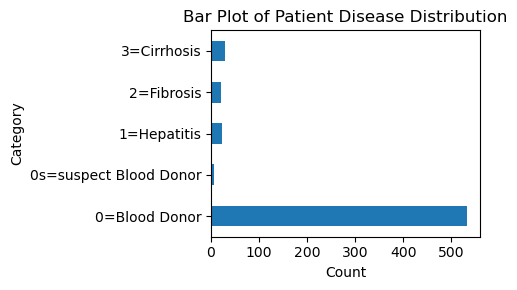

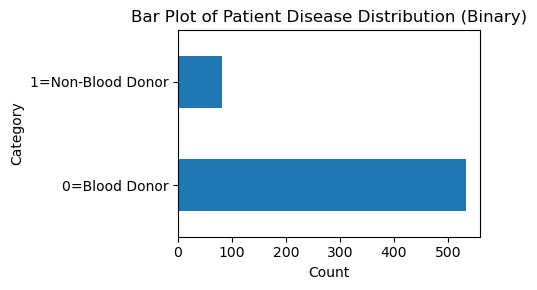

In [7]:
# Visualize Target Variable
correct_order = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
pd.value_counts(df['Category']).reindex(correct_order)
plt.figure(figsize=(5,3))
pd.value_counts(df['Category']).reindex(correct_order).plot.barh()
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Bar Plot of Patient Disease Distribution')
plt.tight_layout()
plt.show()
plt.figure(figsize=(5,3))
pd.value_counts(df1['Category']).plot.barh()
plt.ylabel('Category')
plt.xlabel('Count')
plt.title('Bar Plot of Patient Disease Distribution (Binary)')
plt.tight_layout()
plt.show()

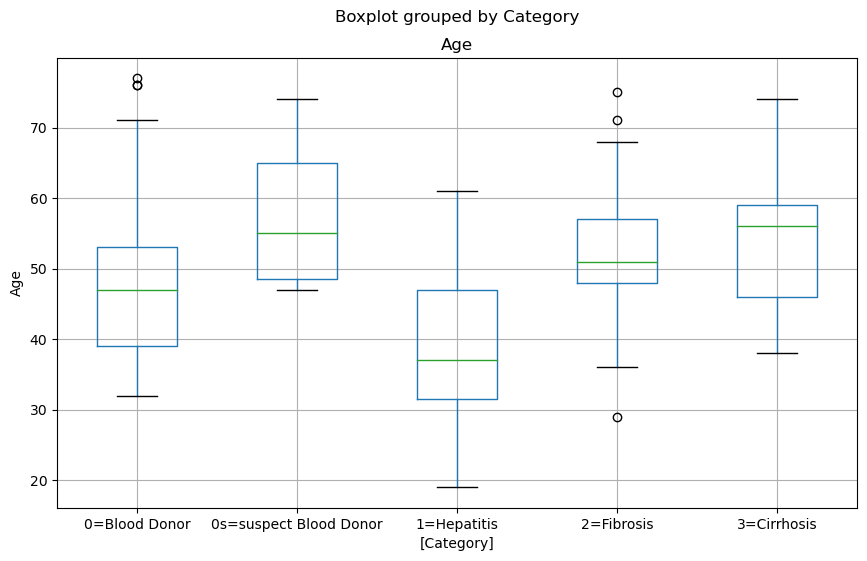

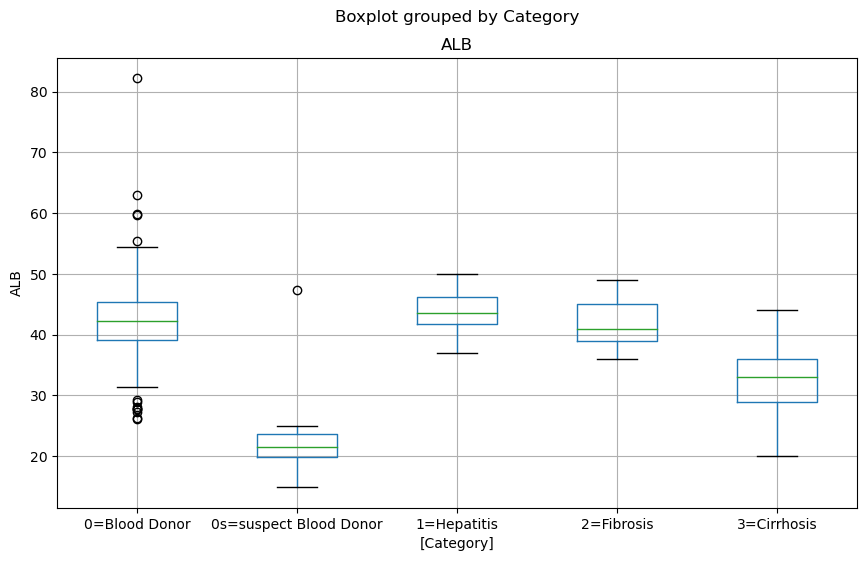

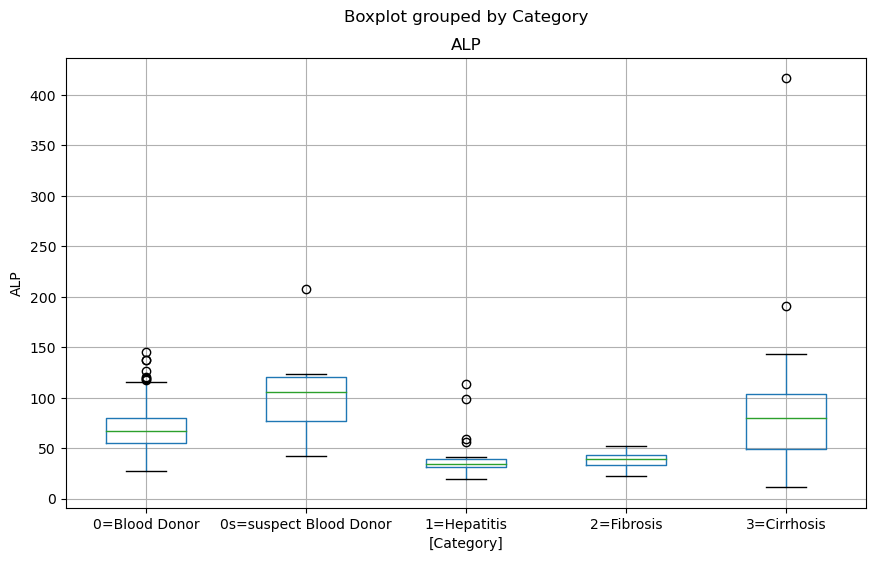

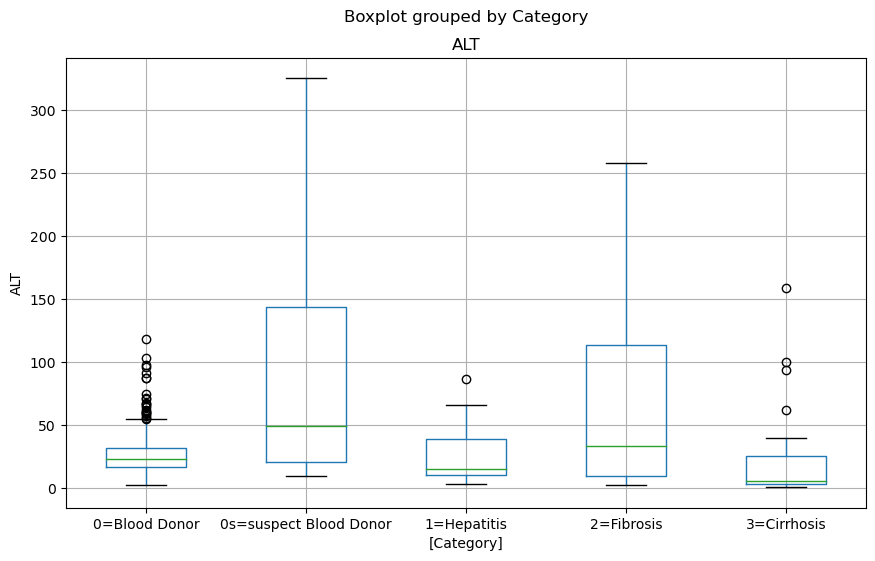

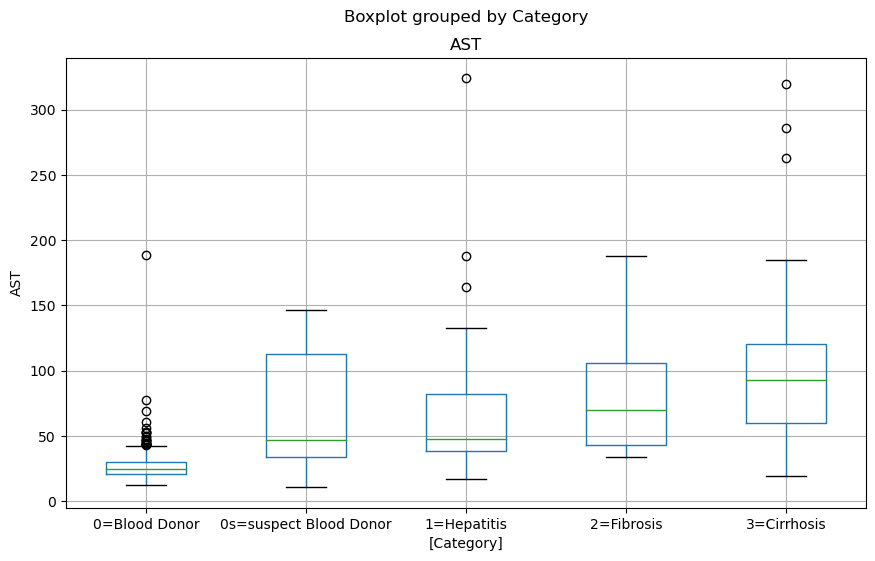

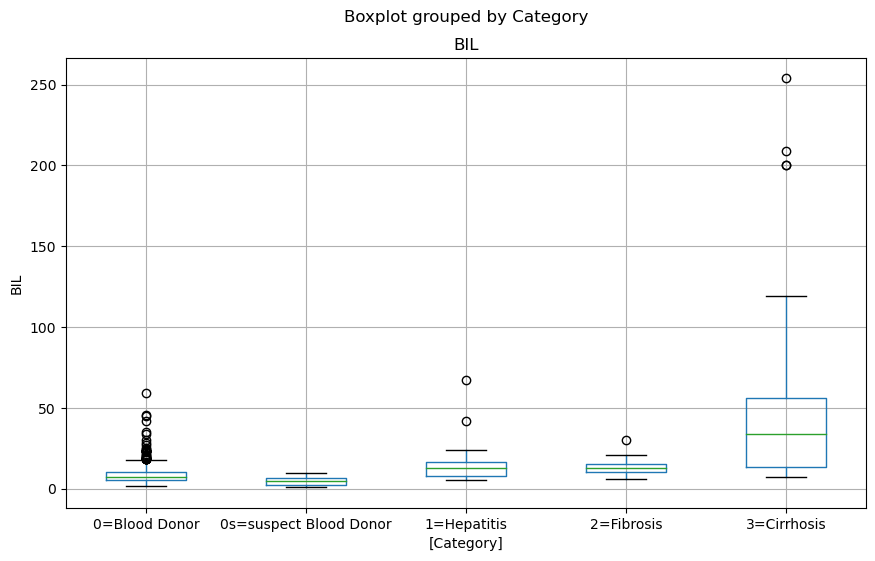

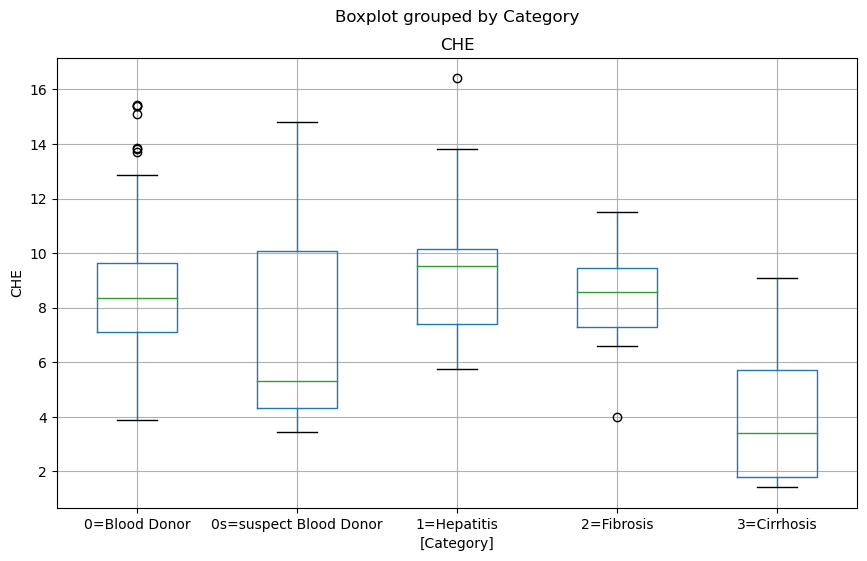

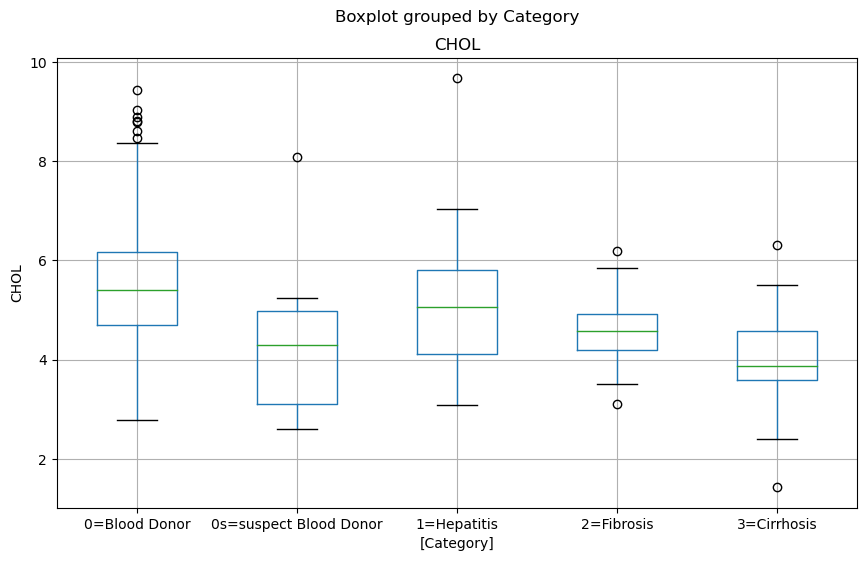

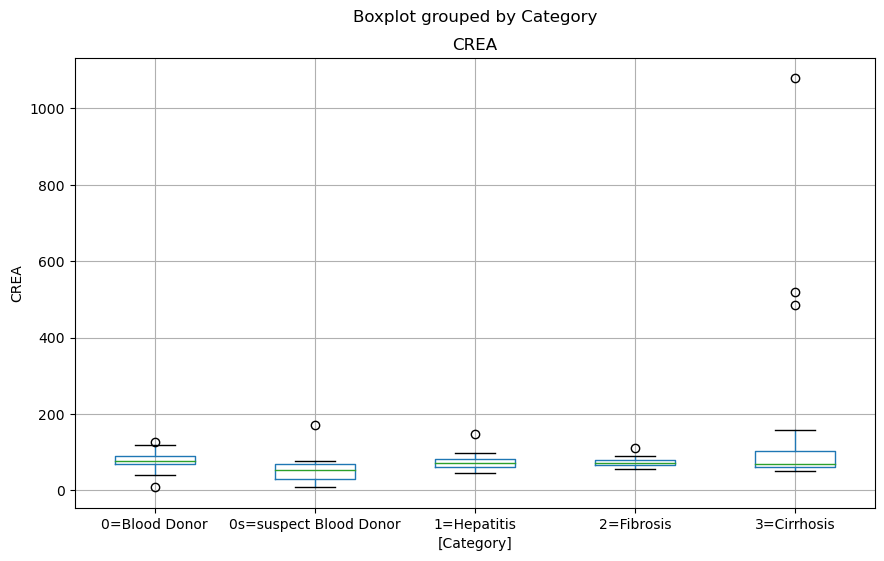

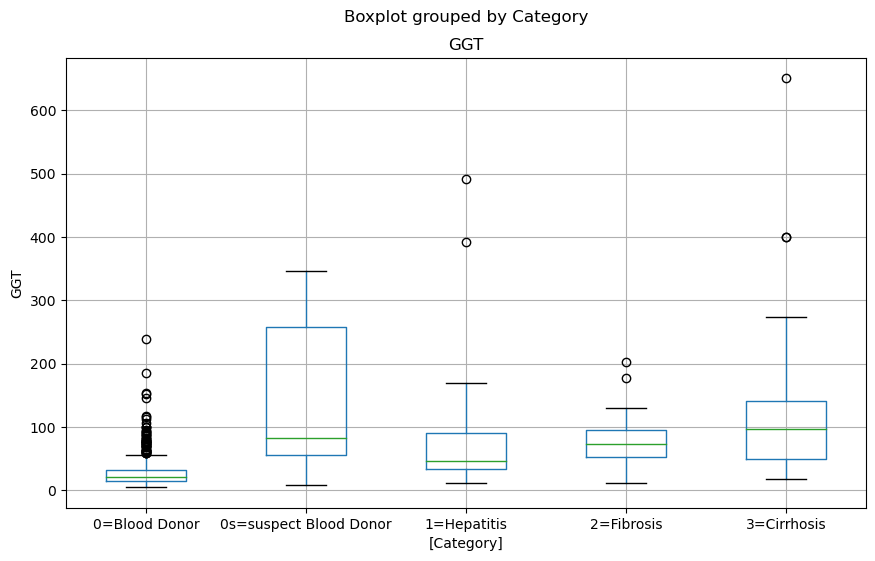

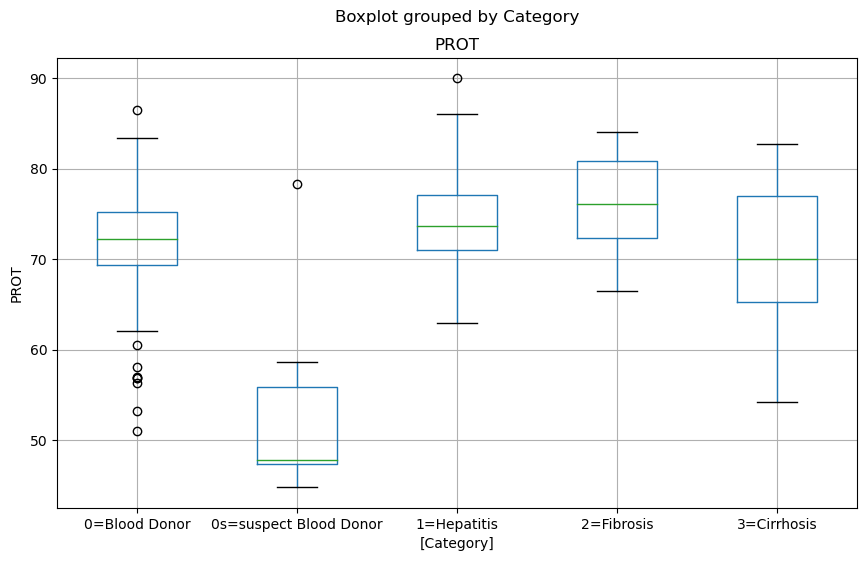

In [15]:
# Boxplots
df[['Age','Category']].boxplot(by='Category',figsize=(10,6))
plt.ylabel('Age')
plt.show()
df[['ALB','Category']].boxplot(by='Category',figsize=(10,6))
plt.ylabel('ALB')
plt.show()
df[['ALP','Category']].boxplot(by='Category',figsize=(10,6))
plt.ylabel('ALP')
plt.show()
df[['ALT','Category']].boxplot(by='Category',figsize=(10,6))
plt.ylabel('ALT')
plt.show()
df[['AST','Category']].boxplot(by='Category',figsize=(10,6))
plt.ylabel('AST')
plt.show()
df[['BIL','Category']].boxplot(by='Category',figsize=(10,6))
plt.ylabel('BIL')
plt.show()
df[['CHE','Category']].boxplot(by='Category',figsize=(10,6))
plt.ylabel('CHE')
plt.show()
df[['CHOL','Category']].boxplot(by='Category',figsize=(10,6))
plt.ylabel('CHOL')
plt.show()
df[['CREA','Category']].boxplot(by='Category',figsize=(10,6))
plt.ylabel('CREA')
plt.show()
df[['GGT','Category']].boxplot(by='Category',figsize=(10,6))
plt.ylabel('GGT')
plt.show()
df[['PROT','Category']].boxplot(by='Category',figsize=(10,6))
plt.ylabel('PROT')
plt.show()

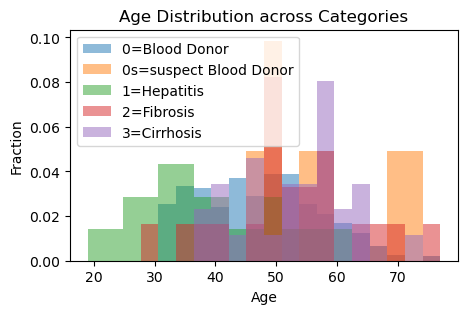

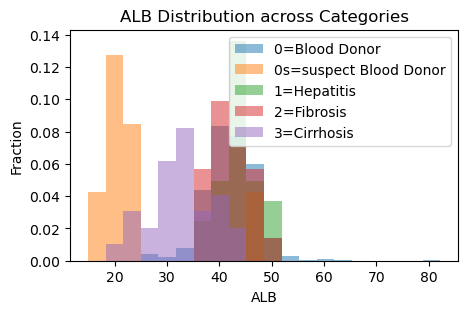

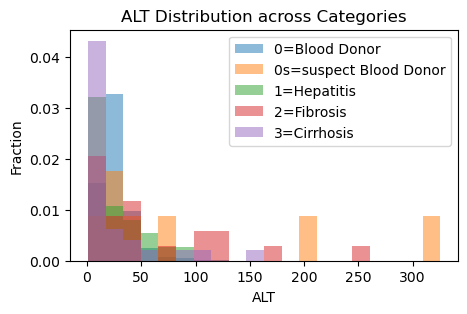

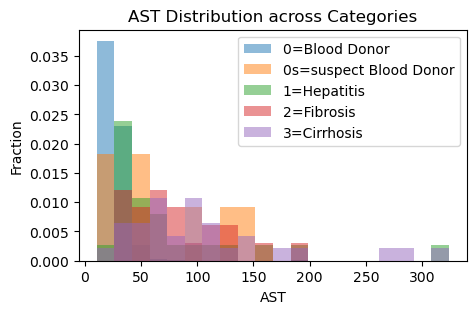

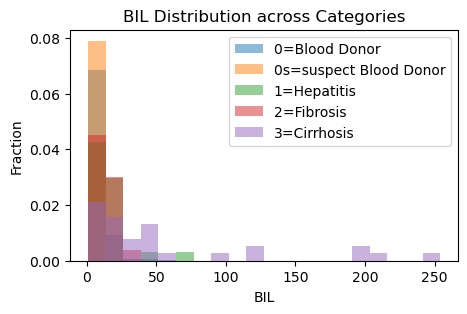

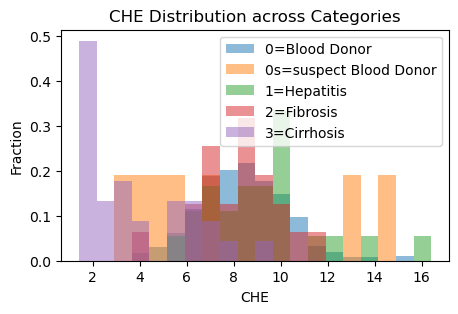

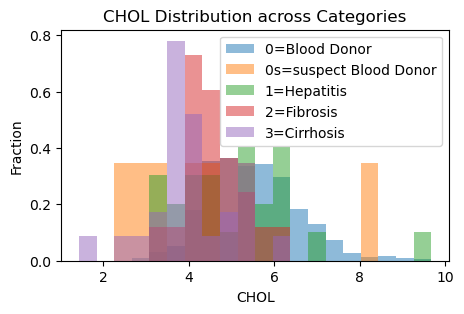

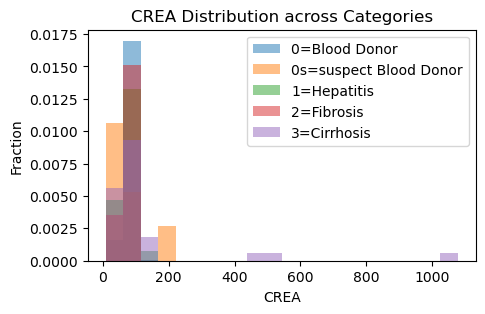

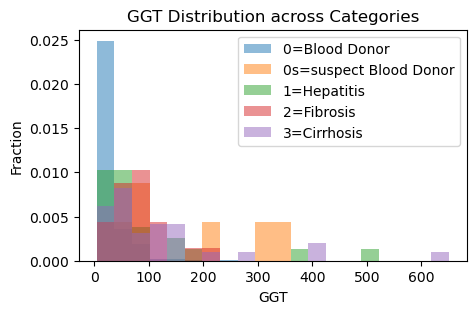

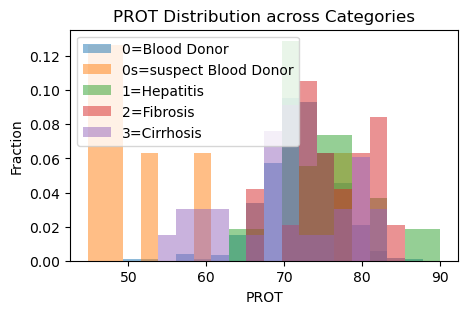

In [9]:
# Category Specific Histograms
categories = df['Category'].unique()
bin_range = (df['Age'].min(),df['Age'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df[df['Category']==c]['Age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('Age')
plt.title('Age Distribution across Categories')
plt.show()
bin_range = (df['ALB'].min(),df['ALB'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df[df['Category']==c]['ALB'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('ALB')
plt.title('ALB Distribution across Categories')
plt.show()
bin_range = (df['ALT'].min(),df['ALT'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df[df['Category']==c]['ALT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('ALT')
plt.title('ALT Distribution across Categories')
plt.show()
bin_range = (df['AST'].min(),df['AST'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df[df['Category']==c]['AST'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('AST')
plt.title('AST Distribution across Categories')
plt.show()
bin_range = (df['BIL'].min(),df['BIL'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df[df['Category']==c]['BIL'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('BIL')
plt.title('BIL Distribution across Categories')
plt.show()
bin_range = (df['CHE'].min(),df['CHE'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df[df['Category']==c]['CHE'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('CHE')
plt.title('CHE Distribution across Categories')
plt.show()
bin_range = (df['CHOL'].min(),df['CHOL'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df[df['Category']==c]['CHOL'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('CHOL')
plt.title('CHOL Distribution across Categories')
plt.show()
bin_range = (df['CREA'].min(),df['CREA'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df[df['Category']==c]['CREA'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('CREA')
plt.title('CREA Distribution across Categories')
plt.show()
bin_range = (df['GGT'].min(),df['GGT'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df[df['Category']==c]['GGT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('GGT')
plt.title('GGT Distribution across Categories')
plt.show()
bin_range = (df['PROT'].min(),df['PROT'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df[df['Category']==c]['PROT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('PROT')
plt.title('PROT Distribution across Categories')
plt.show()

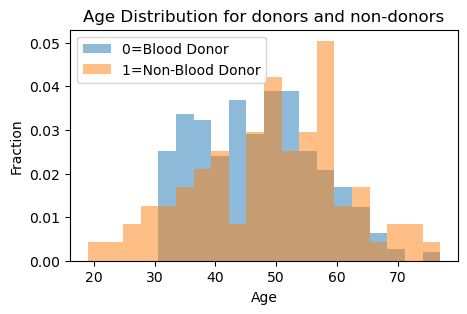

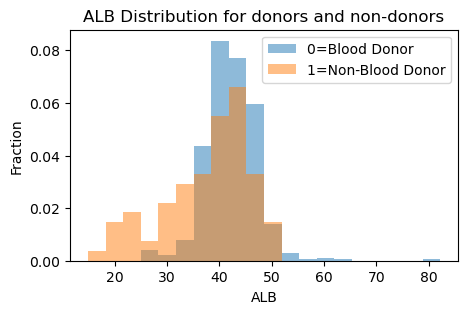

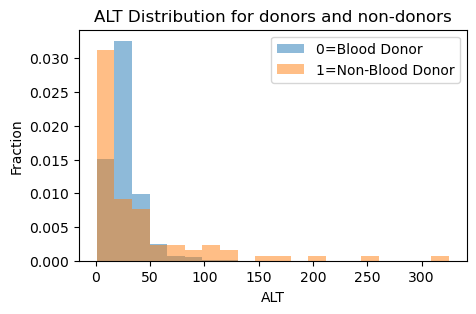

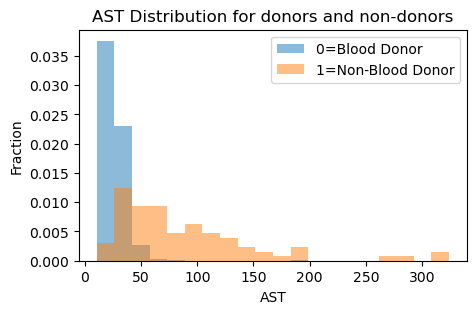

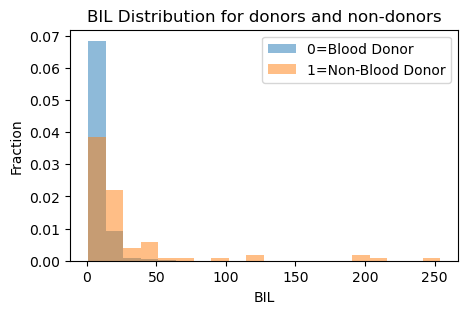

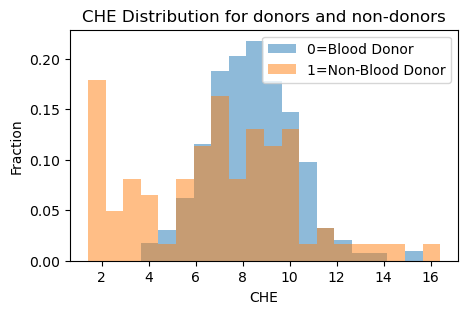

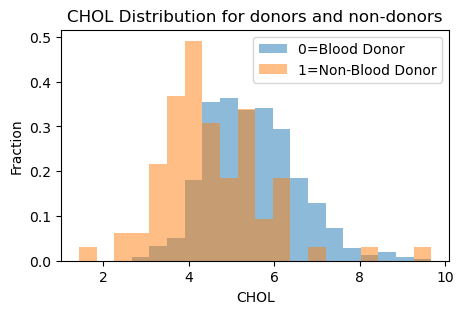

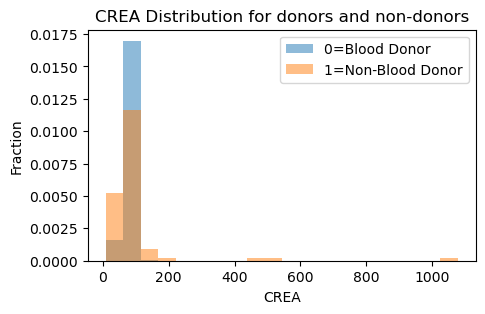

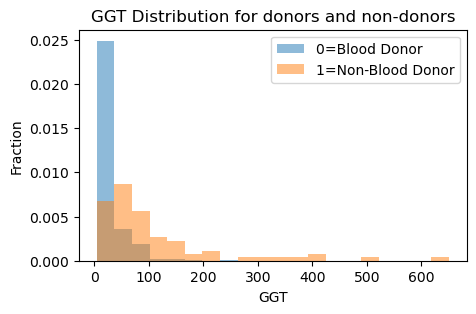

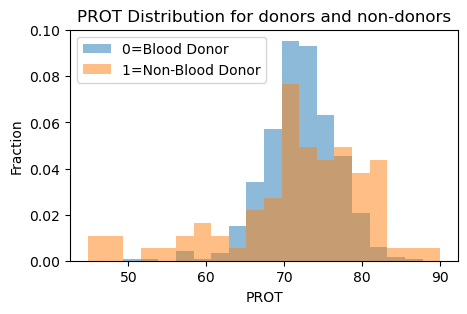

In [10]:
# Category Specific Histograms (Binary)
categories = df1['Category'].unique()
bin_range = (df1['Age'].min(),df1['Age'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df1[df1['Category']==c]['Age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('Age')
plt.title('Age Distribution for donors and non-donors')
plt.show()
bin_range = (df1['ALB'].min(),df1['ALB'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df1[df1['Category']==c]['ALB'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('ALB')
plt.title('ALB Distribution for donors and non-donors')
plt.show()
bin_range = (df1['ALT'].min(),df1['ALT'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df1[df1['Category']==c]['ALT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('ALT')
plt.title('ALT Distribution for donors and non-donors')
plt.show()
bin_range = (df1['AST'].min(),df1['AST'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df1[df1['Category']==c]['AST'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('AST')
plt.title('AST Distribution for donors and non-donors')
plt.show()
bin_range = (df1['BIL'].min(),df1['BIL'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df1[df1['Category']==c]['BIL'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('BIL')
plt.title('BIL Distribution for donors and non-donors')
plt.show()
bin_range = (df1['CHE'].min(),df1['CHE'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df1[df1['Category']==c]['CHE'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('CHE')
plt.title('CHE Distribution for donors and non-donors')
plt.show()
bin_range = (df1['CHOL'].min(),df1['CHOL'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df1[df1['Category']==c]['CHOL'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('CHOL')
plt.title('CHOL Distribution for donors and non-donors')
plt.show()
bin_range = (df1['CREA'].min(),df1['CREA'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df1[df1['Category']==c]['CREA'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('CREA')
plt.title('CREA Distribution for donors and non-donors')
plt.show()
bin_range = (df1['GGT'].min(),df1['GGT'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df1[df1['Category']==c]['GGT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('GGT')
plt.title('GGT Distribution for donors and non-donors')
plt.show()
bin_range = (df1['PROT'].min(),df1['PROT'].max())
plt.figure(figsize=(5,3))
for c in categories:
    plt.hist(df1[df1['Category']==c]['PROT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('PROT')
plt.title('PROT Distribution for donors and non-donors')
plt.show()

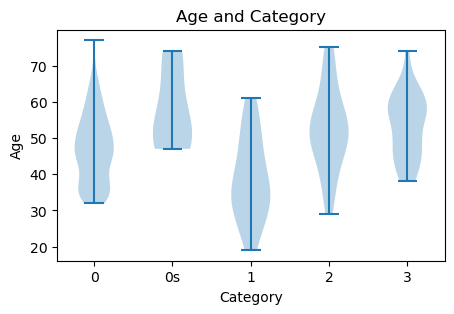

/Users/akshitchhabra/anaconda3/envs/data1030/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


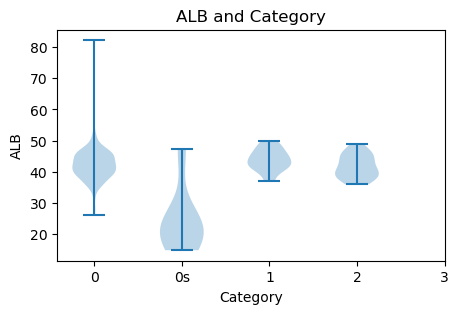

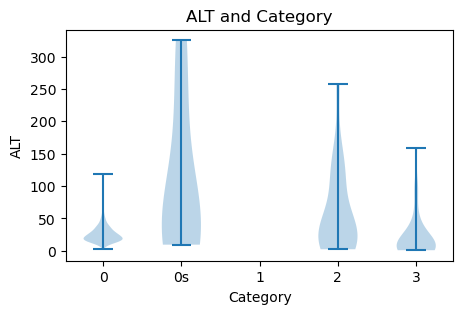

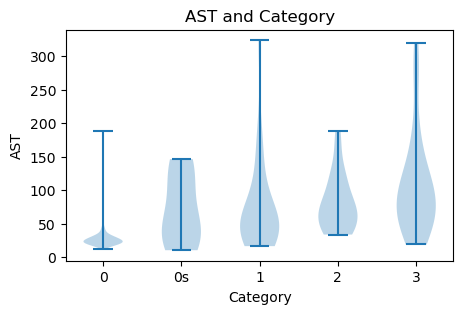

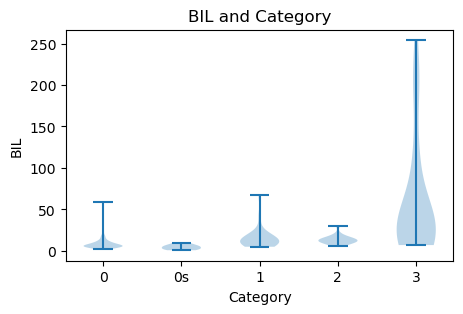

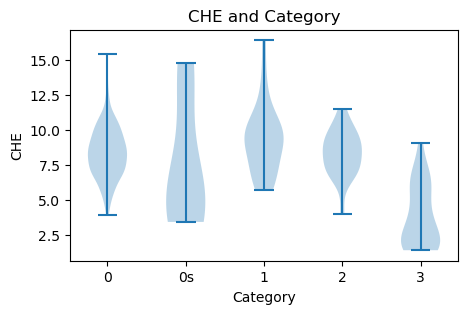

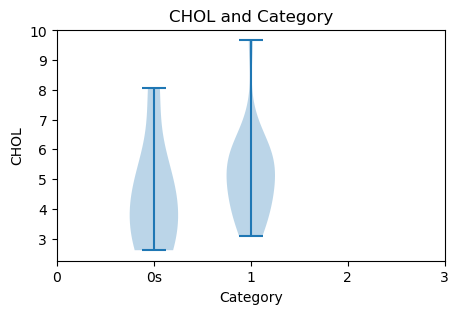

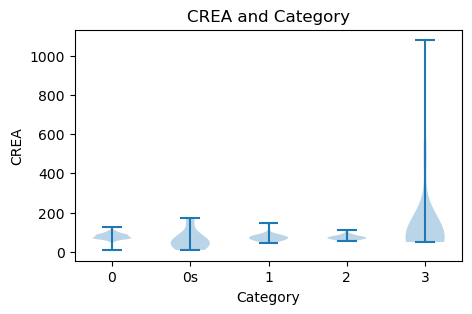

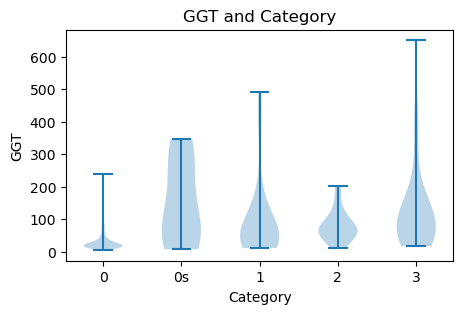

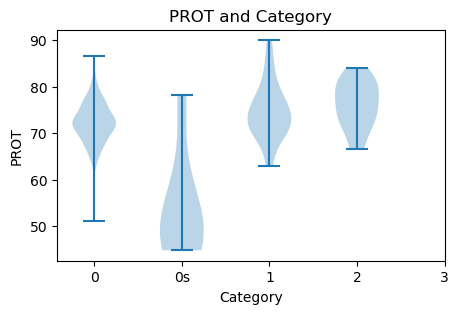

In [11]:
# Violin Plots
dataset = [df[df['Category']=='0=Blood Donor']['Age'].values,
           df[df['Category']=='0s=suspect Blood Donor']['Age'].values,
           df[df['Category']=='1=Hepatitis']['Age'].values,
           df[df['Category']=='2=Fibrosis']['Age'].values,
           df[df['Category']=='3=Cirrhosis']['Age'].values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5],['0','0s','1','2','3'])
plt.ylabel('Age')
plt.xlabel('Category')
plt.title('Age and Category')
plt.show()
dataset = [df[df['Category']=='0=Blood Donor']['ALB'].values,
           df[df['Category']=='0s=suspect Blood Donor']['ALB'].values,
           df[df['Category']=='1=Hepatitis']['ALB'].values,
           df[df['Category']=='2=Fibrosis']['ALB'].values,
           df[df['Category']=='3=Cirrhosis']['ALB'].values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5],['0','0s','1','2','3'])
plt.ylabel('ALB')
plt.xlabel('Category')
plt.title('ALB and Category')
plt.show()
dataset = [df[df['Category']=='0=Blood Donor']['ALT'].values,
           df[df['Category']=='0s=suspect Blood Donor']['ALT'].values,
           df[df['Category']=='1=Hepatitis']['ALT'].values,
           df[df['Category']=='2=Fibrosis']['ALT'].values,
           df[df['Category']=='3=Cirrhosis']['ALT'].values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5],['0','0s','1','2','3'])
plt.ylabel('ALT')
plt.xlabel('Category')
plt.title('ALT and Category')
plt.show()
dataset = [df[df['Category']=='0=Blood Donor']['AST'].values,
           df[df['Category']=='0s=suspect Blood Donor']['AST'].values,
           df[df['Category']=='1=Hepatitis']['AST'].values,
           df[df['Category']=='2=Fibrosis']['AST'].values,
           df[df['Category']=='3=Cirrhosis']['AST'].values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5],['0','0s','1','2','3'])
plt.ylabel('AST')
plt.xlabel('Category')
plt.title('AST and Category')
plt.show()
dataset = [df[df['Category']=='0=Blood Donor']['BIL'].values,
           df[df['Category']=='0s=suspect Blood Donor']['BIL'].values,
           df[df['Category']=='1=Hepatitis']['BIL'].values,
           df[df['Category']=='2=Fibrosis']['BIL'].values,
           df[df['Category']=='3=Cirrhosis']['BIL'].values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5],['0','0s','1','2','3'])
plt.ylabel('BIL')
plt.xlabel('Category')
plt.title('BIL and Category')
plt.show()
dataset = [df[df['Category']=='0=Blood Donor']['CHE'].values,
           df[df['Category']=='0s=suspect Blood Donor']['CHE'].values,
           df[df['Category']=='1=Hepatitis']['CHE'].values,
           df[df['Category']=='2=Fibrosis']['CHE'].values,
           df[df['Category']=='3=Cirrhosis']['CHE'].values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5],['0','0s','1','2','3'])
plt.ylabel('CHE')
plt.xlabel('Category')
plt.title('CHE and Category')
plt.show()
dataset = [df[df['Category']=='0=Blood Donor']['CHOL'].values,
           df[df['Category']=='0s=suspect Blood Donor']['CHOL'].values,
           df[df['Category']=='1=Hepatitis']['CHOL'].values,
           df[df['Category']=='2=Fibrosis']['CHOL'].values,
           df[df['Category']=='3=Cirrhosis']['CHOL'].values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5],['0','0s','1','2','3'])
plt.ylabel('CHOL')
plt.xlabel('Category')
plt.title('CHOL and Category')
plt.show()
dataset = [df[df['Category']=='0=Blood Donor']['CREA'].values,
           df[df['Category']=='0s=suspect Blood Donor']['CREA'].values,
           df[df['Category']=='1=Hepatitis']['CREA'].values,
           df[df['Category']=='2=Fibrosis']['CREA'].values,
           df[df['Category']=='3=Cirrhosis']['CREA'].values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5],['0','0s','1','2','3'])
plt.ylabel('CREA')
plt.xlabel('Category')
plt.title('CREA and Category')
plt.show()
dataset = [df[df['Category']=='0=Blood Donor']['GGT'].values,
           df[df['Category']=='0s=suspect Blood Donor']['GGT'].values,
           df[df['Category']=='1=Hepatitis']['GGT'].values,
           df[df['Category']=='2=Fibrosis']['GGT'].values,
           df[df['Category']=='3=Cirrhosis']['GGT'].values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5],['0','0s','1','2','3'])
plt.ylabel('GGT')
plt.xlabel('Category')
plt.title('GGT and Category')
plt.show()
dataset = [df[df['Category']=='0=Blood Donor']['PROT'].values,
           df[df['Category']=='0s=suspect Blood Donor']['PROT'].values,
           df[df['Category']=='1=Hepatitis']['PROT'].values,
           df[df['Category']=='2=Fibrosis']['PROT'].values,
           df[df['Category']=='3=Cirrhosis']['PROT'].values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5],['0','0s','1','2','3'])
plt.ylabel('PROT')
plt.xlabel('Category')
plt.title('PROT and Category')
plt.show()

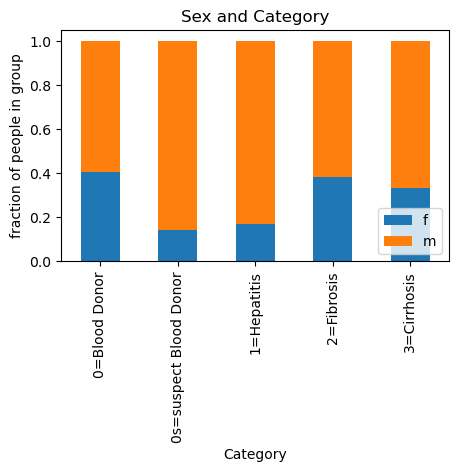

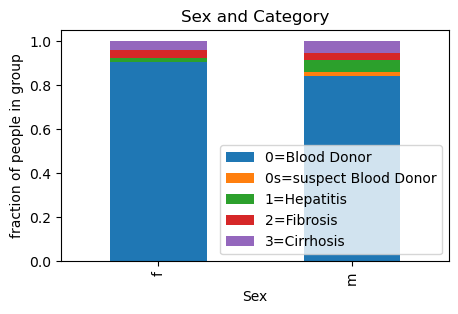

In [12]:
# Stacked Bar Plots
count_matrix = df.groupby(['Category', 'Sex']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.title('Sex and Category')
plt.legend(loc=4)
plt.show()
count_matrix = df.groupby(['Sex', 'Category']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.title('Sex and Category')
plt.legend(loc=4)
plt.show()

In [13]:
# Splitting the data
y = df['Category']
X = df.drop(columns=['Category'])
ftrs = df.columns
random_state = 42
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]

print(X_train.shape)

(369, 12)


In [14]:
# Pre-process the data
cat_ftrs = ['Sex']
num_ftrs = ['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT' ]

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])

X_prep = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names)
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)
print(feature_names)

(369, 13)
(123, 13)
(123, 13)
['num__Age' 'num__ALB' 'num__ALP' 'num__ALT' 'num__AST' 'num__BIL'
 'num__CHE' 'num__CHOL' 'num__CREA' 'num__GGT' 'num__PROT' 'cat__Sex_f'
 'cat__Sex_m']
